In [1]:
import pandas as pd
import webvtt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('I Have a Dream speech by Martin Luther King .Jr HD (subtitled) (Remastered).m4a_clipsize1000_predictions.csv',)

df['timestamp'] = pd.to_timedelta(df['timestamp'])

df = df.sort_values(by='timestamp').reset_index().drop('index', axis=1)

df.head(10)

,timestamp,prediction
0,00:00:00,0.480143
1,00:00:00.500000,0.463314
2,00:00:01,0.458947
3,00:00:01.500000,0.464311
4,00:00:02,0.460542
5,00:00:02.500000,0.446438
6,00:00:03,0.453311
7,00:00:03.500000,0.445715
8,00:00:04,0.458445
9,00:00:04.500000,0.493106


In [3]:
df.tail()

,timestamp,prediction
807,00:06:43.500000,0.457645
808,00:06:44,0.509830
809,00:06:44.500000,0.519282
810,00:06:45,0.551632
811,00:06:45.500000,0.473625


In [47]:
start = []
end = []
text = []
for caption in webvtt.read('I Have a Dream speech by Martin Luther King .Jr HD (subtitled) (Remastered).en.vtt'):
    start.append(caption.start)
    end.append(caption.end)
    text.append(caption.text)
subtitle_df = pd.DataFrame({'start': start, 'end': end, 'text': text})
subtitle_df['start'] = pd.to_timedelta(subtitle_df['start'])
subtitle_df['end'] = pd.to_timedelta(subtitle_df['end'])

In [17]:
subtitle_df[subtitle_df['text'].str.contains('Applause')]

,start,end,text


In [8]:
df = df.set_index('timestamp')

In [48]:
df.describe(percentiles=np.linspace(.1,0.9, num=9))

,timestamp,prediction
count,406,406.000000
mean,0 days 00:03:22.500000,0.637451
std,0 days 00:01:57.346353,0.041563
min,0 days 00:00:00,0.529082
10%,0 days 00:00:40.500000,0.585960
20%,0 days 00:01:21,0.597583
30.0%,0 days 00:02:01.500000,0.612745
40%,0 days 00:02:42,0.626628
50%,0 days 00:03:22.500000,0.639213
60%,0 days 00:04:03,0.651700


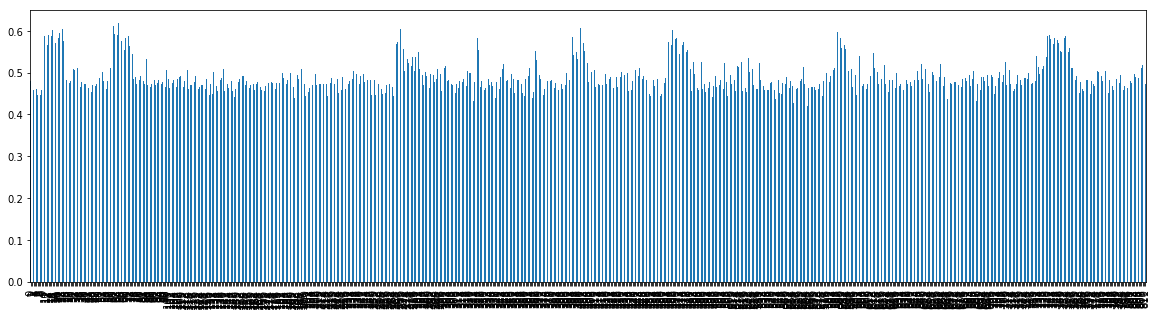

In [4]:
df = df.sort_values(by='timestamp')
df['timestamp_sec'] = df['timestamp'].dt.total_seconds()

df['prediction'].plot(x='timestamp_sec', kind='bar', figsize=(20,5))

In [5]:
start = 0.6
end = 1
for i in np.linspace(start, end, num=1+int((end-start)/0.05))[:-1]:
    name = f'{round(i, 2):.2f}'

    df[name] = df['prediction'].apply(lambda x: 1 if x > df['prediction'].quantile(round(i,2)) else 0)

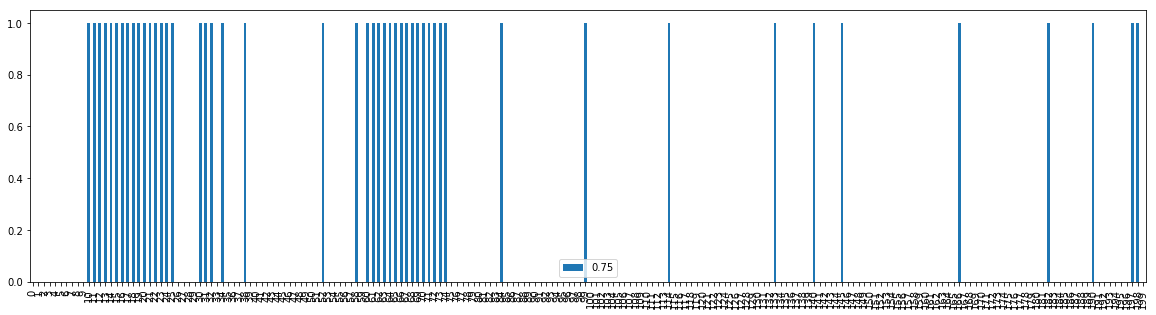

In [16]:
df[['0.75']].iloc[:200].plot(kind='bar', figsize=(20,5))

In [197]:
#df[['0.80', '0.85', '0.90', '0.95']].plot(kind='bar', figsize=(20,5))
df[['0.80', '0.95']].plot(x='timestamp_sec', kind='bar', figsize=(20,5))

KeyError: 'timestamp_sec'

In [7]:
df.describe()

,timestamp,prediction,timestamp_sec,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95
count,812,812.000000,812.000000,812.000000,812.000000,812.000000,812.00000,812.000000,812.000000,812.000000,812.000000
mean,0 days 00:03:22.750000,0.490321,202.750000,0.400246,0.349754,0.300493,0.25000,0.200739,0.150246,0.100985,0.050493
std,0 days 00:01:57.274251,0.036510,117.274251,0.490250,0.477186,0.458755,0.43328,0.400800,0.357533,0.301495,0.219094
min,0 days 00:00:00,0.420920,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0 days 00:01:41.375000,0.468293,101.375000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,0 days 00:03:22.750000,0.480876,202.750000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,0 days 00:05:04.125000,0.500379,304.125000,1.000000,1.000000,1.000000,0.25000,0.000000,0.000000,0.000000,0.000000
max,0 days 00:06:45.500000,0.619068,405.500000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.head(10)

,timestamp,prediction,timestamp_sec,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95
0,00:00:00,0.480143,0.0,0,0,0,0,0,0,0,0
1,00:00:00.500000,0.463314,0.5,0,0,0,0,0,0,0,0
2,00:00:01,0.458947,1.0,0,0,0,0,0,0,0,0
3,00:00:01.500000,0.464311,1.5,0,0,0,0,0,0,0,0
4,00:00:02,0.460542,2.0,0,0,0,0,0,0,0,0
5,00:00:02.500000,0.446438,2.5,0,0,0,0,0,0,0,0
6,00:00:03,0.453311,3.0,0,0,0,0,0,0,0,0
7,00:00:03.500000,0.445715,3.5,0,0,0,0,0,0,0,0
8,00:00:04,0.458445,4.0,0,0,0,0,0,0,0,0
9,00:00:04.500000,0.493106,4.5,1,1,0,0,0,0,0,0


In [20]:
df[df['0.75']==1][['timestamp_sec', '0.75', 'prediction']].iloc[25:100]

,timestamp_sec,0.75,prediction
62,31.0,1,0.610598
63,31.5,1,0.590463
64,32.0,1,0.619068
65,32.5,1,0.583105
66,33.0,1,0.575684
67,33.5,1,0.564690
68,34.0,1,0.555044
69,34.5,1,0.582808
70,35.0,1,0.583234
71,35.5,1,0.588247


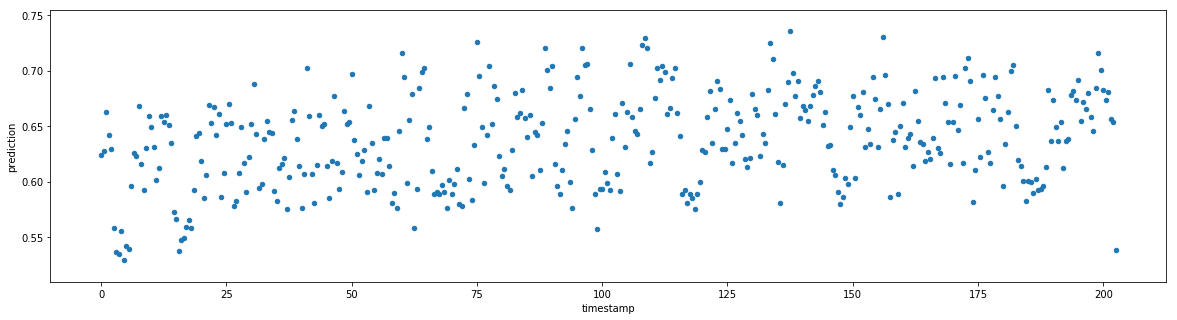

In [44]:
df2['timestamp'] = df2['timestamp'].dt.total_seconds()
df2.plot(x='timestamp', y='prediction', kind='scatter', figsize=(20,5))